In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# f = open('.\\chinavis2018挑战一数据\\2017-11-0'+str(1)+'\\weblog.csv')
df = pd.DataFrame()

for i in range(1, 31):
    f = codecs.open('.\\chinavis2018挑战一数据\\2017-11-' + '%02d' % i + '\\weblog.csv', mode='r',
                    encoding='utf-8', errors='ignore')
    tmp = pd.read_csv(f, header=0)
    print(tmp.shape)
    df = df.append(tmp, ignore_index=True)

print(df.shape)


(7376, 6)
(7111, 6)
(7330, 6)
(79, 6)
(374, 6)
(7200, 6)
(7142, 6)
(7500, 6)
(7181, 6)
(6887, 6)
(411, 6)
(545, 6)
(7478, 6)
(7546, 6)
(7437, 6)
(7526, 6)
(7413, 6)
(638, 6)
(733, 6)
(7262, 6)
(7287, 6)
(7468, 6)
(7650, 6)
(7444, 6)
(816, 6)
(728, 6)
(7160, 6)
(7353, 6)
(7231, 6)
(7155, 6)
(165461, 6)


In [3]:
import json
ip_to_id_dict = json.load(open('ip_to_id_dict.json', 'r'))
id_to_idx_dict = {}
idx_to_id_dict = {}

for (i, (ip, id)) in enumerate(ip_to_id_dict.items()):
    id_to_idx_dict[id] = i
    idx_to_id_dict[i] = id

print(len(ip_to_id_dict))
# print(id_to_idx_dict)
# print(idx_to_id_dict)

299


In [10]:
import numpy as np
print(df['dip'].unique().shape)
# for i in range(len(df)):
#     if df['dip'][i] in ip_to_id_dict.keys():
#         print(df['dip'][i])

web_dips = df['dip'].value_counts()
dip_to_idx_dict = {}
idx_to_dip_dict = {}
for i, dip in enumerate(web_dips.index):
#     print(i, dip)
    dip_to_idx_dict[dip] = i
    idx_to_dip_dict[i] = dip
# print(dip_to_idx_dict, idx_to_dip_dict)

web_counts_per_id_per_dip = np.zeros(shape=(len(id_to_idx_dict), len(web_dips)))

for i in range(len(df)):
    s_idx = id_to_idx_dict[ip_to_id_dict[df['sip'][i]]]
    d_idx = dip_to_idx_dict[df['dip'][i]]
    web_counts_per_id_per_dip[s_idx, d_idx] += 1
web_counts_per_id_per_dip

(345,)


array([[153.,  67.,   0., ...,   0.,   0.,   0.],
       [249., 119.,   0., ...,   0.,   0.,   0.],
       [298., 117.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 79.,  43.,  46., ...,   0.,   0.,   0.],
       [ 71.,  45.,  44., ...,   0.,   0.,   0.],
       [ 79.,  26.,   0., ...,   0.,   0.,   0.]])

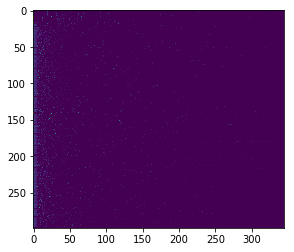

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(web_counts_per_id_per_dip)


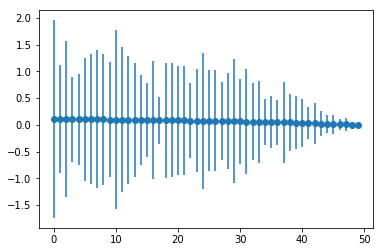

In [13]:
web_counts_per_dip_mean = np.mean(web_counts_per_id_per_dip, axis=0)
# web_counts_per_dip_std = np.max(web_counts_per_id_per_dip, axis=0) - np.min(web_counts_per_id_per_dip, axis=0)
web_counts_per_dip_std = np.std(web_counts_per_id_per_dip, axis=0) #/ np.sqrt(len(web_counts_per_id_per_dip))
web_counts_per_dip_max = np.max(web_counts_per_id_per_dip, axis=0)

plt.errorbar(range(50), web_counts_per_dip_mean[-50:], web_counts_per_dip_std[-50:], fmt='o')
# plt.plot(range(50), web_counts_per_dip_max[-50:])
plt.show()

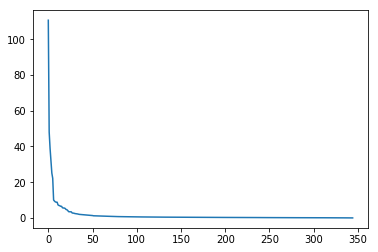

In [14]:
plt.plot(range(len(web_counts_per_dip_mean)), web_counts_per_dip_mean)

In [15]:
ip_to_id_dict.items()

dict_items([('10.64.105.235', '1498'), ('10.64.106.7', '1378'), ('10.64.106.3', '1110'), ('10.64.105.122', '1186'), ('10.64.106.42', '1251'), ('10.64.105.83', '1431'), ('10.64.105.8', '1108'), ('10.64.105.198', '1467'), ('10.64.106.5', '1165'), ('10.64.106.4', '1013'), ('10.64.106.38', '1295'), ('10.64.106.8', '1312'), ('10.64.105.81', '1327'), ('10.64.106.23', '1248'), ('10.64.105.243', '1369'), ('10.64.105.43', '1124'), ('10.64.106.32', '1371'), ('10.64.105.76', '1305'), ('10.64.106.10', '1499'), ('10.64.105.195', '1092'), ('10.64.105.132', '1489'), ('10.64.105.211', '1398'), ('10.64.105.12', '1342'), ('10.64.105.99', '1195'), ('10.64.105.183', '1254'), ('10.64.105.117', '1193'), ('10.64.105.72', '1286'), ('10.64.105.207', '1130'), ('10.64.105.54', '1257'), ('10.64.105.190', '1103'), ('10.64.105.133', '1132'), ('10.64.105.136', '1424'), ('10.64.105.73', '1151'), ('10.64.105.203', '1417'), ('10.64.105.112', '1456'), ('10.64.105.179', '1394'), ('10.64.105.97', '1219'), ('10.64.106.36',

In [26]:
a_web_counts = web_counts_per_id_per_dip[:, :-10]
b_web_counts = web_counts_per_id_per_dip[:, -10:]
list_web_counts = np.concatenate((a_web_counts, b_web_counts), axis=1).tolist()
file_path = '.\\网页\\web_counts.json'
json.dump(list_web_counts, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)

In [31]:
dip_to_host_dict = {}
for i in range(len(df)):
    if not pd.isnull(df['host'][i]):
        dip_to_host_dict[df['dip'][i]] = df['host'][i]
print(dip_to_host_dict.items())

dict_items([('54.222.60.218', 'www.amazon.cn'), ('10.5.71.60', 'email.hightech.com'), ('116.1.238.73', 'sports.sina.com.cn'), ('220.181.112.244', 'www.baidu.com'), ('183.134.15.16', 'v.6.cn'), ('10.63.120.70', 'OA.hightech.com'), ('140.205.62.20', 'ai.taobao.com'), ('140.205.248.2', 'china.alibaba.com'), ('183.134.9.58', 'ent.ifeng.com'), ('111.206.81.174', 'www.so.com'), ('13.112.36.4', 'www.acfun.tv'), ('10.50.50.29', 'lib02.hightech.com'), ('10.50.50.28', 'lib01.hightech.com'), ('104.28.8.49', 'www.vpsee.com'), ('10.50.50.26', 'git.hightech.com'), ('10.50.50.27', 'jira.hightech.com'), ('183.131.192.83', 'ent.163.com'), ('111.225.222.134', 'www.mypm.net'), ('183.131.124.41', 'www.chinaz.com'), ('199.119.126.68', 'www.infoq.com'), ('115.231.74.62', 'sports.cntv.cn'), ('114.80.130.60', 'sports.sohu.com'), ('54.225.152.117', 'www.technologyreview.com'), ('202.108.12.40', 'nba.tom.com'), ('47.90.104.180', 'xiaoxia.org'), ('59.151.18.44', 'www.jiayuan.com'), ('218.244.139.171', 'www.progr

In [42]:
dip_to_host_dict[idx_to_dip_dict[269]]

'http://www.kanzhun.com/'

In [ ]:
cum_sum = pd.value_counts(df['dip']).cumsum()

print(len(cum_sum))

plt.plot(range(len(cum_sum)), cum_sum)
plt.hlines(cum_sum[-1], 0, len(cum_sum))
plt.show()